In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Run 1

In [3]:
training = pd.read_csv('./model_run_1_data/history_tl.csv')
training = training.rename(columns={'Unnamed: 0':'Epoch'})

In [4]:
training['Epoch'] = training['Epoch']+1

In [5]:
training.head(6)

,Epoch,acc,loss,val_acc,val_loss
0,1,0.504205,1.669639,0.565665,1.603235
1,2,0.628777,1.098132,0.698312,1.078396
2,3,0.657887,1.014414,0.661916,1.164880
3,4,0.676000,0.953108,0.711905,1.021741
4,5,0.684687,0.926682,0.694585,1.225341
5,6,0.688661,0.913082,0.716510,0.992027


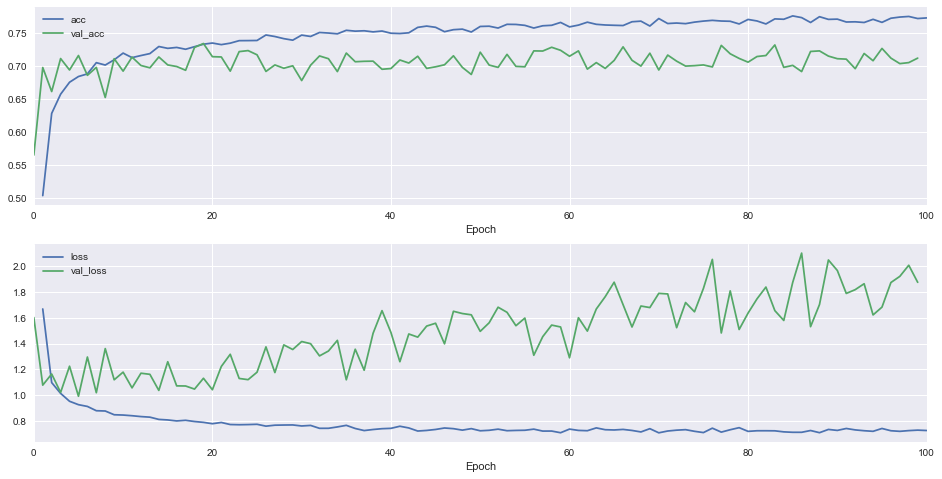

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training.plot(x='Epoch', y='acc', ax=ax1)
training.plot(y='val_acc', ax=ax1)

training.plot(x='Epoch', y='loss', ax=ax2)
training.plot(y='val_loss', ax=ax2)

Looks like c. Epoch 20 is best place to try and FT from.

### Run 2

In [7]:
training2 = pd.read_csv('./model_run_2_data/history_tl_run2.csv')
training2 = training2.rename(columns={'Unnamed: 0':'Epoch'})
training2['Epoch'] = training2['Epoch']+1
training2.head(6)

,Epoch,acc,loss,val_acc,val_loss
0,1,0.455903,2.180962,0.695404,1.038493
1,2,0.602308,1.176325,0.640132,1.243888
2,3,0.642328,1.065629,0.686392,1.069958
3,4,0.673818,0.984538,0.748273,0.908474
4,5,0.677707,0.955504,0.714629,1.071398
5,6,0.688998,0.929949,0.630820,1.488248


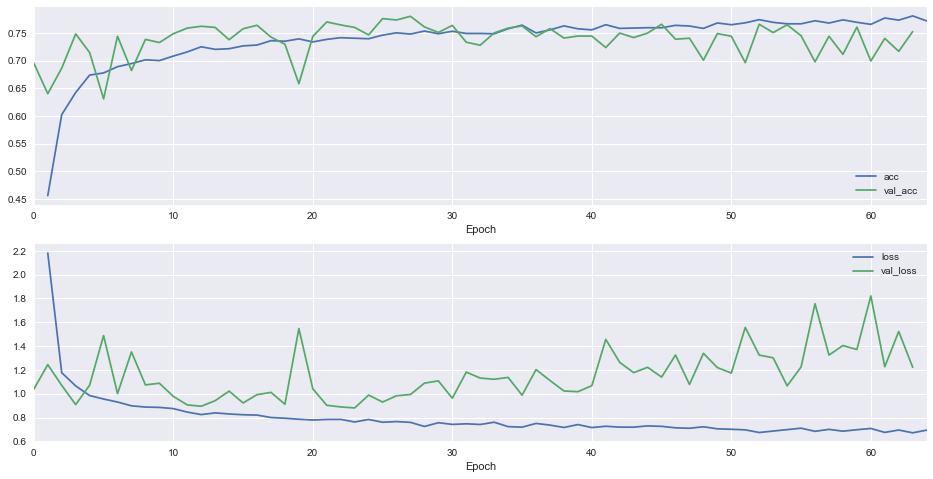

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training2.plot(x='Epoch', y='acc', ax=ax1)
training2.plot(y='val_acc', ax=ax1)

training2.plot(x='Epoch', y='loss', ax=ax2)
training2.plot(y='val_loss', ax=ax2)

Looks to be around 20. Run again (32 epochs) saving checkpoints every 2 epochs


### Run 3

In [9]:
training3 = pd.read_csv('./model_run_3_data/history_tl_run3.csv')
training3 = training3.rename(columns={'Unnamed: 0':'Epoch'})
training3['Epoch'] = training3['Epoch']+1
training3.head(6)

,Epoch,acc,loss,val_acc,val_loss
0,1,0.461297,2.015115,0.640733,1.178186
1,2,0.606323,1.166829,0.624512,1.339733
2,3,0.648099,1.041972,0.697807,1.194861
3,4,0.671058,0.980630,0.691199,1.119488
4,5,0.681721,0.953736,0.732652,0.915784
5,6,0.680718,0.936362,0.675879,1.207930


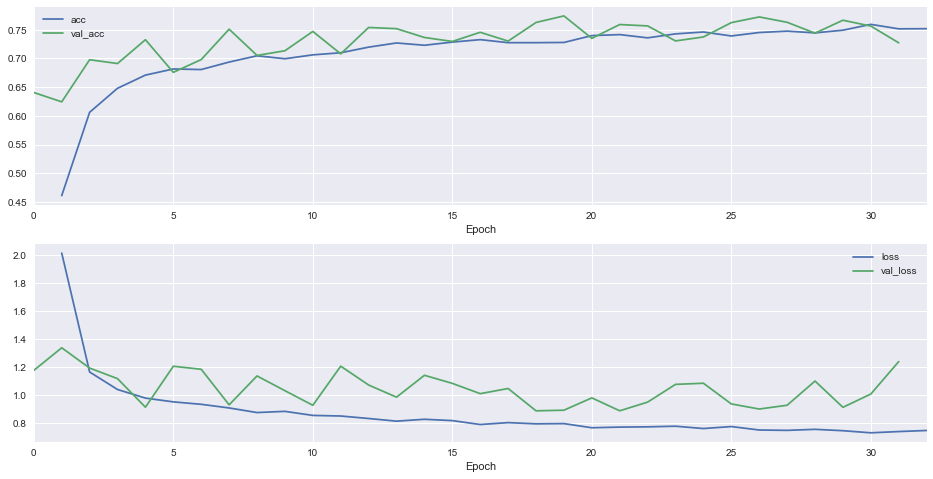

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training3.plot(x='Epoch', y='acc', ax=ax1)
training3.plot(y='val_acc', ax=ax1)

training3.plot(x='Epoch', y='loss', ax=ax2)
training3.plot(y='val_loss', ax=ax2)

ERROR - only saved tl every 5 epochs (!). Run again ....

### Run 4

In [11]:
training4 = pd.read_csv('./model_run_4_data/history_tl_run4.csv')
training4 = training4.rename(columns={'Unnamed: 0':'Epoch'})
training4['Epoch'] = training4['Epoch']+1
training4.head(36)

,Epoch,acc,loss,val_acc,val_loss
0,1,0.462426,2.051751,0.466506,1.803280
1,2,0.607327,1.164263,0.725743,0.934247
2,3,0.639819,1.055614,0.715831,1.035717
3,4,0.667419,0.986833,0.721838,1.076178
4,5,0.679839,0.951644,0.706819,1.181702
5,6,0.685359,0.933683,0.738059,0.934090
6,7,0.697654,0.899602,0.714929,1.149163
7,8,0.701041,0.894313,0.762391,0.837142
8,9,0.715970,0.858978,0.733253,0.961416
9,10,0.711454,0.862027,0.746170,1.011159


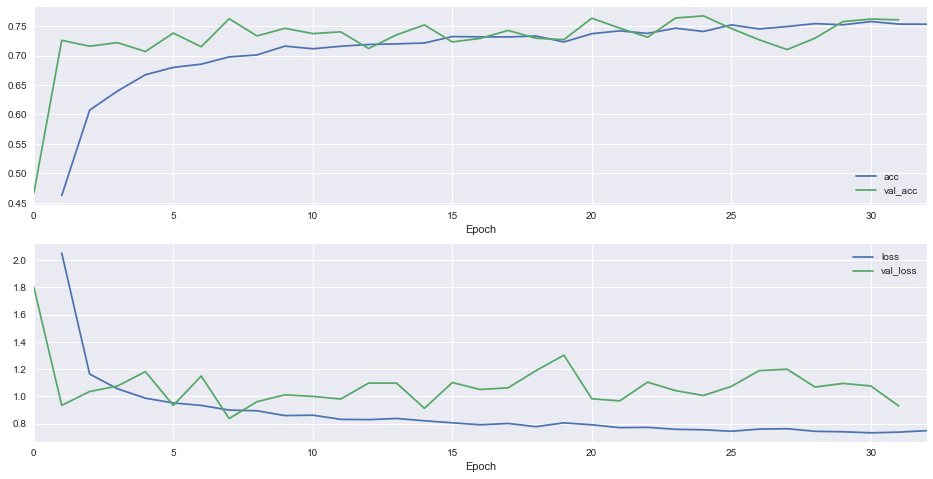

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training4.plot(x='Epoch', y='acc', ax=ax1)
training4.plot(y='val_acc', ax=ax1)

training4.plot(x='Epoch', y='loss', ax=ax2)
training4.plot(y='val_loss', ax=ax2)

### Run 4 - Fine tune
`model_output_2018-03-18_21`

In [14]:
training4_ft = pd.read_csv('./model_run_4_data/history_ft_run4.csv')
training4_ft = training4_ft.rename(columns={'Unnamed: 0':'Epoch'})
training4_ft['Epoch'] = training4_ft['Epoch']+1
training4_ft.head(36)

,Epoch,acc,loss,val_acc,val_loss
0,1,0.780078,0.652164,0.762391,0.773511
1,2,0.808054,0.571897,0.765095,0.747366
2,3,0.821603,0.531818,0.766296,0.747092
3,4,0.827249,0.509987,0.760889,0.751820
4,5,0.841927,0.465719,0.774106,0.729428
5,6,0.850709,0.452210,0.783118,0.711551
6,7,0.853469,0.440821,0.776509,0.718830
7,8,0.858989,0.417904,0.781015,0.713716
8,9,0.863505,0.390665,0.787324,0.679067
9,10,0.863505,0.399045,0.793331,0.667848


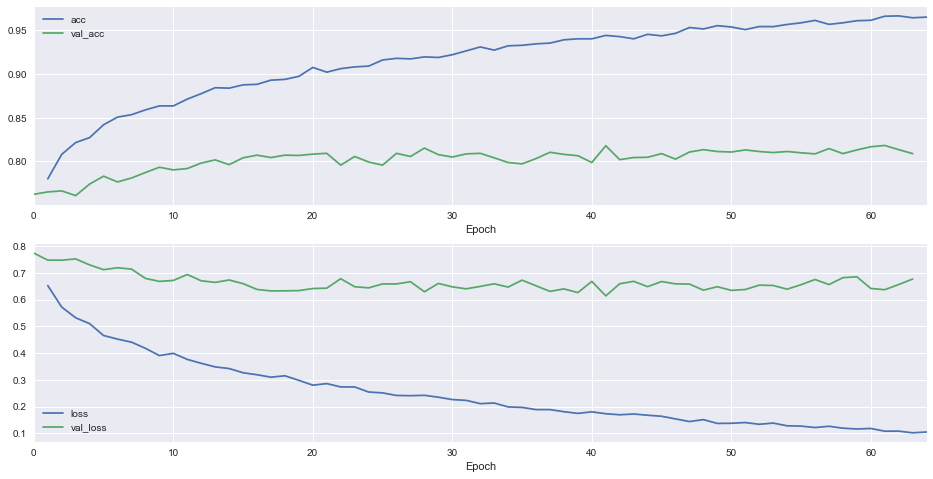

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

training4_ft.plot(x='Epoch', y='acc', ax=ax1)
training4_ft.plot(y='val_acc', ax=ax1)

training4_ft.plot(x='Epoch', y='loss', ax=ax2)
training4_ft.plot(y='val_loss', ax=ax2)

Run 20 looks to be where val_loss is at a min - before overfitting...

`Incv3_nested_run_4_FT_ft_20-0.63.hdf5`

looks to be model to benchmark on